In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [4]:
# Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений 
# от ботов и обычных пользователей сайта Яндекс.Метрика.

In [5]:
df_step_1 = pd.read_csv('/home/jupyter-s.volosjuk-15/lesson_7/step_1_lesson_7.csv')

In [6]:
df_step_1

date user_type  visits
0  2020-06-15    People   417.0
1  2020-06-15    Robots   177.0
2  2020-06-16    People   472.0
3  2020-06-16    Robots    91.0
4  2020-06-17    People   475.0
5  2020-06-17    Robots   138.0

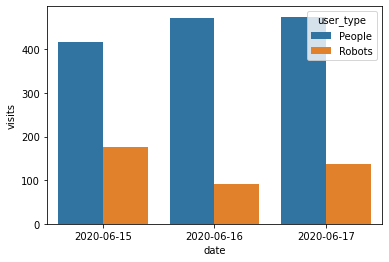

In [7]:
sns.barplot(x='date', y='visits', data=df_step_1, hue='user_type' )

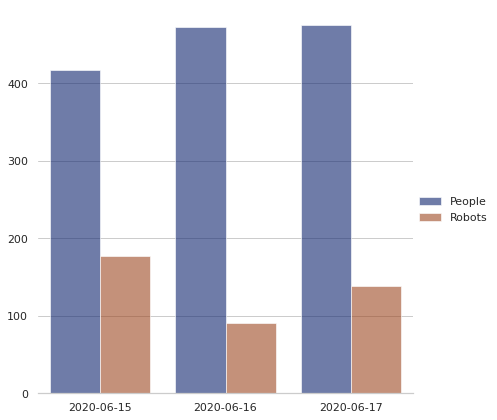

In [8]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df_step_1, kind="bar",
    x="date", y="visits", hue="user_type",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "")
g.legend.set_title("")

In [9]:
# Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome.

In [10]:
df_step_2 = pd.read_csv('/home/jupyter-s.volosjuk-15/lesson_7/step_2_lesson_7.csv')

In [11]:
df_step_2.head()

date         browser  visits
0  2020-06-15   Google Chrome   354.0
1  2020-06-15         Firefox    58.0
2  2020-06-15  Yandex Browser    54.0
3  2020-06-15          Safari    41.0
4  2020-06-15   Chrome Mobile    31.0

In [12]:
df_step_2['share'] = (df_step_2.visits / df_step_2.visits.sum() * 100)

In [14]:
df_step_2

date             browser  visits      share
0   2020-06-15       Google Chrome   354.0  59.595960
1   2020-06-15             Firefox    58.0   9.764310
2   2020-06-15      Yandex Browser    54.0   9.090909
3   2020-06-15              Safari    41.0   6.902357
4   2020-06-15       Chrome Mobile    31.0   5.218855
5   2020-06-15               Opera    16.0   2.693603
6   2020-06-15       Mobile Safari    16.0   2.693603
7   2020-06-15    Samsung Internet     9.0   1.515152
8   2020-06-15                Edge     5.0   0.841751
9   2020-06-15               UCWEB     4.0   0.673401
10  2020-06-15            Chromium     2.0   0.336700
11  2020-06-15     Android Browser     1.0   0.168350
12  2020-06-15  Yandex: mobile app     1.0   0.168350
13  2020-06-15             Vivaldi     1.0   0.168350
14  2020-06-15              CocCoc     1.0   0.168350

In [ ]:
# Давайте выясним, с какого браузера приходит больше всего ботов.

In [22]:
df_step_3 = pd.read_csv('/home/jupyter-s.volosjuk-15/lesson_7/step_3_lesson_7.csv')

In [23]:
df_step_3.head()

date         browser user_type  visits
0  2020-06-15   Google Chrome    People   250.0
1  2020-06-15   Google Chrome    Robots   104.0
2  2020-06-15  Yandex Browser    People    47.0
3  2020-06-15         Firefox    Robots    31.0
4  2020-06-15   Chrome Mobile    People    31.0

In [24]:
df = df_step_3.pivot(index='browser', columns='user_type', values='visits')
df

user_type           People  Robots
browser                           
Android Browser        1.0     NaN
Chrome Mobile         31.0     NaN
Chromium               1.0     1.0
CocCoc                 1.0     NaN
Edge                   4.0     1.0
Firefox               27.0    31.0
Google Chrome        250.0   104.0
Mobile Safari         15.0     1.0
Opera                 11.0     5.0
Safari                19.0    22.0
Samsung Internet       8.0     1.0
UCWEB                  NaN     4.0
Vivaldi                1.0     NaN
Yandex Browser        47.0     7.0
Yandex: mobile app     1.0     NaN

In [25]:
df = df.reset_index().fillna(0)
df.head()

user_type          browser  People  Robots
0          Android Browser     1.0     0.0
1            Chrome Mobile    31.0     0.0
2                 Chromium     1.0     1.0
3                   CocCoc     1.0     0.0
4                     Edge     4.0     1.0

In [28]:
df['robots_share'] = df.Robots / (df.People + df.Robots) * 100
df.head()

user_type          browser  People  Robots  robots_share
0          Android Browser     1.0     0.0           0.0
1            Chrome Mobile    31.0     0.0           0.0
2                 Chromium     1.0     1.0          50.0
3                   CocCoc     1.0     0.0           0.0
4                     Edge     4.0     1.0          20.0

In [29]:
df.query('robots_share == robots_share.max()')

user_type browser  People  Robots  robots_share
11          UCWEB     0.0     4.0         100.0

In [ ]:
# Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для
# каждого из этих разрезов.
# В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

# Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще 
#     всех-всех заходов на сайт за этот день.

In [43]:
df_step_4 = pd.read_csv('/home/jupyter-s.volosjuk-15/lesson_7/step_4_lesson_7.csv')

In [44]:
df_step_4.head()

date         browser user_type  visits
0  2020-06-15   Google Chrome    People   250.0
1  2020-06-15   Google Chrome    Robots   104.0
2  2020-06-15  Yandex Browser    People    47.0
3  2020-06-15         Firefox    Robots    31.0
4  2020-06-15   Chrome Mobile    People    31.0

In [45]:
df_step_4['share'] = (df_step_4.visits / df_step_4.visits.sum() * 100).round(1)

In [46]:
df_step_4.query("browser=='Safari' & user_type=='People'")

date browser user_type  visits  share
7  2020-06-15  Safari    People    19.0    3.2

In [47]:
df_step_4

date             browser user_type  visits  share
0   2020-06-15       Google Chrome    People   250.0   42.1
1   2020-06-15       Google Chrome    Robots   104.0   17.5
2   2020-06-15      Yandex Browser    People    47.0    7.9
3   2020-06-15             Firefox    Robots    31.0    5.2
4   2020-06-15       Chrome Mobile    People    31.0    5.2
5   2020-06-15             Firefox    People    27.0    4.5
6   2020-06-15              Safari    Robots    22.0    3.7
7   2020-06-15              Safari    People    19.0    3.2
8   2020-06-15       Mobile Safari    People    15.0    2.5
9   2020-06-15               Opera    People    11.0    1.9
10  2020-06-15    Samsung Internet    People     8.0    1.3
11  2020-06-15      Yandex Browser    Robots     7.0    1.2
12  2020-06-15               Opera    Robots     5.0    0.8
13  2020-06-15               UCWEB    Robots     4.0    0.7
14  2020-06-15                Edge    People     4.0    0.7
15  2020-06-15       Mobile Safari    Robots     1.0    0.2
16  2020-06-15     Android Browser    People     1.0    0.2
17  2020-06-15            Chromium    People     1.0    0.2
18  2020-06-15            Chromium    Robots     1.0    0.2
19  2020-06-15  Yandex: mobile app    People     1.0    0.2
20  2020-06-15             Vivaldi    People     1.0    0.2
21  2020-06-15                Edge    Robots     1.0    0.2
22  2020-06-15              CocCoc    People     1.0    0.2
23  2020-06-15    Samsung Internet    Robots     1.0    0.2

In [48]:
# Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. 
# Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и 
# посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.
# В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

In [49]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [50]:
df.head()

date         browser user_type  users
0  2020-06-15   Google Chrome    People  240.0
1  2020-06-15   Google Chrome    Robots  104.0
2  2020-06-15  Yandex Browser    People   44.0
3  2020-06-15   Chrome Mobile    People   30.0
4  2020-06-15         Firefox    Robots   29.0

In [51]:
df = df.merge(df_step_4, on=['browser', 'user_type', 'date'])

In [52]:
df.head()

date         browser user_type  users  visits  share
0  2020-06-15   Google Chrome    People  240.0   250.0   42.1
1  2020-06-15   Google Chrome    Robots  104.0   104.0   17.5
2  2020-06-15  Yandex Browser    People   44.0    47.0    7.9
3  2020-06-15   Chrome Mobile    People   30.0    31.0    5.2
4  2020-06-15         Firefox    Robots   29.0    31.0    5.2

In [53]:
df['visits_per_user'] = df.visits / df.users

In [54]:
df.head()

date         browser user_type  users  visits  share  visits_per_user
0  2020-06-15   Google Chrome    People  240.0   250.0   42.1         1.041667
1  2020-06-15   Google Chrome    Robots  104.0   104.0   17.5         1.000000
2  2020-06-15  Yandex Browser    People   44.0    47.0    7.9         1.068182
3  2020-06-15   Chrome Mobile    People   30.0    31.0    5.2         1.033333
4  2020-06-15         Firefox    Robots   29.0    31.0    5.2         1.068966

In [55]:
df.query("browser=='Google Chrome' & user_type=='Robots'")

date        browser user_type  users  visits  share  visits_per_user
1  2020-06-15  Google Chrome    Robots  104.0   104.0   17.5              1.0

In [56]:
df = pd.read_excel('/home/jupyter-s.volosjuk-15/lesson_7/tables.xlsx')

In [59]:
df


Unnamed: 0  company41  company51  company50  company76  company47  \
0         NaN        580        198        968        220        788   
1         NaN        786        271         69        566        NaN   
2         NaN        578        NaN        526         74        984   
3         NaN        614        NaN        589        575         85   
4         NaN         44        849        992        155        527   
5         NaN        859        966        918        312        NaN   
6         NaN        225        486         20        367        339   
7         NaN        NaN        NaN        NaN        NaN        NaN   
8         NaN        NaN        NaN        NaN        NaN        NaN   
9         NaN  company41  company51  company50  company76  company47   
10        NaN        110        828        253        NaN        818   
11        NaN        958        266        105        870        384   
12        NaN        843         19        467        784        885   
13        NaN        143        583        NaN        NaN        716   
14        NaN        499        469        666        887        142   
15        NaN        110        828        253        260        818   
16        NaN        NaN        NaN        NaN        NaN        NaN   
17        NaN        NaN        NaN        NaN        NaN        NaN   
18        NaN  company41  company51  company50  company76  company47   
19        NaN        361        104        495        652        990   
20        NaN        131        278        449        215        NaN   
21        NaN        537        631        870        794        NaN   
22  company41  company51  company50  company76  company47  company27   
23         16        151        217        144        993        633   
24        819         43        660        NaN        312        936   
25        227        783        589        NaN        516        782   
26        625        858        228        NaN        832        197   
27        NaN        NaN        NaN        NaN        NaN        NaN   
28        NaN  company41  company51  company50  company76  company47   
29        NaN        324        128         97        141        965   
30        NaN         51        196        826        151        729   
31        NaN        700        523        NaN        NaN        NaN   
32        NaN        847        727        624        560        902   
33        NaN        730        225         51        136         58   
34        NaN        721        768        265        831        624   
35        NaN        NaN        NaN        NaN        NaN        NaN   
36        NaN        NaN        NaN        NaN        NaN        NaN   
37        NaN        NaN        NaN        NaN        NaN        NaN   
38        NaN  company41  company51  company50  company76  company47   
39        NaN        438        933        508        988        635   
40        NaN        427        424        651        790        971   
41        NaN        887        260        321        719        377   
42        NaN        185        650        447        983        543   
43        NaN        543        278        371        967        181   

    company27  company48  
0         554        479  
1         193        636  
2         581        951  
3         122        454  
4          33        NaN  
5         404        407  
6         481        252  
7         NaN        NaN  
8         NaN        NaN  
9   company27  company48  
10         15        752  
11        NaN        NaN  
12        870        177  
13        671        907  
14        487         33  
15         15        752  
16        NaN        NaN  
17        NaN        NaN  
18  company27  company48  
19        169        488  
20        NaN        427  
21        NaN        186  
22  company48        NaN  
23        747        NaN  
24        983        NaN  
25        736        NaN  
26        116        NaN  
27    

In [67]:
df=df.dropna(how='all').reset_index(drop=True)

In [68]:
df

Unnamed: 0  company41  company51  company50  company76  company47  \
0         NaN        580        198        968        220        788   
1         NaN        786        271         69        566        NaN   
2         NaN        578        NaN        526         74        984   
3         NaN        614        NaN        589        575         85   
4         NaN         44        849        992        155        527   
5         NaN        859        966        918        312        NaN   
6         NaN        225        486         20        367        339   
7         NaN  company41  company51  company50  company76  company47   
8         NaN        110        828        253        NaN        818   
9         NaN        958        266        105        870        384   
10        NaN        843         19        467        784        885   
11        NaN        143        583        NaN        NaN        716   
12        NaN        499        469        666        887        142   
13        NaN        110        828        253        260        818   
14        NaN  company41  company51  company50  company76  company47   
15        NaN        361        104        495        652        990   
16        NaN        131        278        449        215        NaN   
17        NaN        537        631        870        794        NaN   
18  company41  company51  company50  company76  company47  company27   
19         16        151        217        144        993        633   
20        819         43        660        NaN        312        936   
21        227        783        589        NaN        516        782   
22        625        858        228        NaN        832        197   
23        NaN  company41  company51  company50  company76  company47   
24        NaN        324        128         97        141        965   
25        NaN         51        196        826        151        729   
26        NaN        700        523        NaN        NaN        NaN   
27        NaN        847        727        624        560        902   
28        NaN        730        225         51        136         58   
29        NaN        721        768        265        831        624   
30        NaN  company41  company51  company50  company76  company47   
31        NaN        438        933        508        988        635   
32        NaN        427        424        651        790        971   
33        NaN        887        260        321        719        377   
34        NaN        185        650        447        983        543   
35        NaN        543        278        371        967        181   

    company27  company48  
0         554        479  
1         193        636  
2         581        951  
3         122        454  
4          33        NaN  
5         404        407  
6         481        252  
7   company27  company48  
8          15        752  
9         NaN        NaN  
10        870        177  
11        671        907  
12        487         33  
13         15        752  
14  company27  company48  
15        169        488  
16        NaN        427  
17        NaN        186  
18  company48        NaN  
19        747        NaN  
20        983        NaN  
21        736        NaN  
22        116        NaN  
23  company27  company48  
24        750        720  
25        924        586  
26        665         85  
27        600        372  
28        344        250  
29        351        661  
30  company27  company48  
31        257        809  
32        136        134  
33        890        183  
34        348        681  
35         59        660

In [71]:
part_df=df.loc[df['Unnamed: 0'].notna()].copy()
part_df

Unnamed: 0  company41  company51  company50  company76  company47  \
18  company41  company51  company50  company76  company47  company27   
19         16        151        217        144        993        633   
20        819         43        660        NaN        312        936   
21        227        783        589        NaN        516        782   
22        625        858        228        NaN        832        197   

    company27 company48  
18  company48       NaN  
19        747       NaN  
20        983       NaN  
21        736       NaN  
22        116       NaN

In [75]:
df=df.loc[df['Unnamed: 0'].isna()]

In [76]:
df

Unnamed: 0  company41  company51  company50  company76  company47  \
0         NaN        580        198        968        220        788   
1         NaN        786        271         69        566        NaN   
2         NaN        578        NaN        526         74        984   
3         NaN        614        NaN        589        575         85   
4         NaN         44        849        992        155        527   
5         NaN        859        966        918        312        NaN   
6         NaN        225        486         20        367        339   
7         NaN  company41  company51  company50  company76  company47   
8         NaN        110        828        253        NaN        818   
9         NaN        958        266        105        870        384   
10        NaN        843         19        467        784        885   
11        NaN        143        583        NaN        NaN        716   
12        NaN        499        469        666        887        142   
13        NaN        110        828        253        260        818   
14        NaN  company41  company51  company50  company76  company47   
15        NaN        361        104        495        652        990   
16        NaN        131        278        449        215        NaN   
17        NaN        537        631        870        794        NaN   
23        NaN  company41  company51  company50  company76  company47   
24        NaN        324        128         97        141        965   
25        NaN         51        196        826        151        729   
26        NaN        700        523        NaN        NaN        NaN   
27        NaN        847        727        624        560        902   
28        NaN        730        225         51        136         58   
29        NaN        721        768        265        831        624   
30        NaN  company41  company51  company50  company76  company47   
31        NaN        438        933        508        988        635   
32        NaN        427        424        651        790        971   
33        NaN        887        260        321        719        377   
34        NaN        185        650        447        983        543   
35        NaN        543        278        371        967        181   

    company27  company48  
0         554        479  
1         193        636  
2         581        951  
3         122        454  
4          33        NaN  
5         404        407  
6         481        252  
7   company27  company48  
8          15        752  
9         NaN        NaN  
10        870        177  
11        671        907  
12        487         33  
13         15        752  
14  company27  company48  
15        169        488  
16        NaN        427  
17        NaN        186  
23  company27  company48  
24        750        720  
25        924        586  
26        665         85  
27        600        372  
28        344        250  
29        351        661  
30  company27  company48  
31        257        809  
32        136        134  
33        890        183  
34        348        681  
35         59        660

In [78]:
df=df.drop(columns='Unnamed: 0')

In [79]:
df

company41  company51  company50  company76  company47  company27  \
0         580        198        968        220        788        554   
1         786        271         69        566        NaN        193   
2         578        NaN        526         74        984        581   
3         614        NaN        589        575         85        122   
4          44        849        992        155        527         33   
5         859        966        918        312        NaN        404   
6         225        486         20        367        339        481   
7   company41  company51  company50  company76  company47  company27   
8         110        828        253        NaN        818         15   
9         958        266        105        870        384        NaN   
10        843         19        467        784        885        870   
11        143        583        NaN        NaN        716        671   
12        499        469        666        887        142        487   
13        110        828        253        260        818         15   
14  company41  company51  company50  company76  company47  company27   
15        361        104        495        652        990        169   
16        131        278        449        215        NaN        NaN   
17        537        631        870        794        NaN        NaN   
23  company41  company51  company50  company76  company47  company27   
24        324        128         97        141        965        750   
25         51        196        826        151        729        924   
26        700        523        NaN        NaN        NaN        665   
27        847        727        624        560        902        600   
28        730        225         51        136         58        344   
29        721        768        265        831        624        351   
30  company41  company51  company50  company76  company47  company27   
31        438        933        508        988        635        257   
32        427        424        651        790        971        136   
33        887        260        321        719        377        890   
34        185        650        447        983        543        348   
35        543        278        371        967        181         59   

    company48  
0         479  
1         636  
2         951  
3         454  
4         NaN  
5         407  
6         252  
7   company48  
8         752  
9         NaN  
10        177  
11        907  
12         33  
13        752  
14  company48  
15        488  
16        427  
17        186  
23  company48  
24        720  
25        586  
26         85  
27        372  
28        250  
29        661  
30  company48  
31        809  
32        134  
33        183  
34        681  
35        660

In [80]:
part_df

Unnamed: 0  company41  company51  company50  company76  company47  \
18  company41  company51  company50  company76  company47  company27   
19         16        151        217        144        993        633   
20        819         43        660        NaN        312        936   
21        227        783        589        NaN        516        782   
22        625        858        228        NaN        832        197   

    company27 company48  
18  company48       NaN  
19        747       NaN  
20        983       NaN  
21        736       NaN  
22        116       NaN

In [83]:
part_df.drop(columns='company48', inplace=True)

In [84]:
part_df.columns=part_df.loc[18]

In [87]:
part_df.drop(index=18, inplace=True)

In [88]:
part_df

18 company41 company51 company50 company76 company47 company27 company48
19        16       151       217       144       993       633       747
20       819        43       660       NaN       312       936       983
21       227       783       589       NaN       516       782       736
22       625       858       228       NaN       832       197       116

In [89]:
df

company41  company51  company50  company76  company47  company27  \
0         580        198        968        220        788        554   
1         786        271         69        566        NaN        193   
2         578        NaN        526         74        984        581   
3         614        NaN        589        575         85        122   
4          44        849        992        155        527         33   
5         859        966        918        312        NaN        404   
6         225        486         20        367        339        481   
7   company41  company51  company50  company76  company47  company27   
8         110        828        253        NaN        818         15   
9         958        266        105        870        384        NaN   
10        843         19        467        784        885        870   
11        143        583        NaN        NaN        716        671   
12        499        469        666        887        142        487   
13        110        828        253        260        818         15   
14  company41  company51  company50  company76  company47  company27   
15        361        104        495        652        990        169   
16        131        278        449        215        NaN        NaN   
17        537        631        870        794        NaN        NaN   
23  company41  company51  company50  company76  company47  company27   
24        324        128         97        141        965        750   
25         51        196        826        151        729        924   
26        700        523        NaN        NaN        NaN        665   
27        847        727        624        560        902        600   
28        730        225         51        136         58        344   
29        721        768        265        831        624        351   
30  company41  company51  company50  company76  company47  company27   
31        438        933        508        988        635        257   
32        427        424        651        790        971        136   
33        887        260        321        719        377        890   
34        185        650        447        983        543        348   
35        543        278        371        967        181         59   

    company48  
0         479  
1         636  
2         951  
3         454  
4         NaN  
5         407  
6         252  
7   company48  
8         752  
9         NaN  
10        177  
11        907  
12         33  
13        752  
14  company48  
15        488  
16        427  
17        186  
23  company48  
24        720  
25        586  
26         85  
27        372  
28        250  
29        661  
30  company48  
31        809  
32        134  
33        183  
34        681  
35        660

In [90]:
columns=[]
for i, row in df.iterrows():
    try:
        row.astype(float)
    except:
        columns.append(i)

In [91]:
columns

[7, 14, 23, 30]

In [92]:
df=df.drop(index=columns)

In [93]:
df

company41 company51 company50 company76 company47 company27 company48
0        580       198       968       220       788       554       479
1        786       271        69       566       NaN       193       636
2        578       NaN       526        74       984       581       951
3        614       NaN       589       575        85       122       454
4         44       849       992       155       527        33       NaN
5        859       966       918       312       NaN       404       407
6        225       486        20       367       339       481       252
8        110       828       253       NaN       818        15       752
9        958       266       105       870       384       NaN       NaN
10       843        19       467       784       885       870       177
11       143       583       NaN       NaN       716       671       907
12       499       469       666       887       142       487        33
13       110       828       253       260       818        15       752
15       361       104       495       652       990       169       488
16       131       278       449       215       NaN       NaN       427
17       537       631       870       794       NaN       NaN       186
24       324       128        97       141       965       750       720
25        51       196       826       151       729       924       586
26       700       523       NaN       NaN       NaN       665        85
27       847       727       624       560       902       600       372
28       730       225        51       136        58       344       250
29       721       768       265       831       624       351       661
31       438       933       508       988       635       257       809
32       427       424       651       790       971       136       134
33       887       260       321       719       377       890       183
34       185       650       447       983       543       348       681
35       543       278       371       967       181        59       660

In [96]:
df=pd.concat((df, part_df))

In [97]:
df

18 company41 company51 company50 company76 company47 company27 company48
0        580       198       968       220       788       554       479
1        786       271        69       566       NaN       193       636
2        578       NaN       526        74       984       581       951
3        614       NaN       589       575        85       122       454
4         44       849       992       155       527        33       NaN
5        859       966       918       312       NaN       404       407
6        225       486        20       367       339       481       252
8        110       828       253       NaN       818        15       752
9        958       266       105       870       384       NaN       NaN
10       843        19       467       784       885       870       177
11       143       583       NaN       NaN       716       671       907
12       499       469       666       887       142       487        33
13       110       828       253       260       818        15       752
15       361       104       495       652       990       169       488
16       131       278       449       215       NaN       NaN       427
17       537       631       870       794       NaN       NaN       186
24       324       128        97       141       965       750       720
25        51       196       826       151       729       924       586
26       700       523       NaN       NaN       NaN       665        85
27       847       727       624       560       902       600       372
28       730       225        51       136        58       344       250
29       721       768       265       831       624       351       661
31       438       933       508       988       635       257       809
32       427       424       651       790       971       136       134
33       887       260       321       719       377       890       183
34       185       650       447       983       543       348       681
35       543       278       371       967       181        59       660
19        16       151       217       144       993       633       747
20       819        43       660       NaN       312       936       983
21       227       783       589       NaN       516       782       736
22       625       858       228       NaN       832       197       116

In [98]:
df.company41.sum()

14918